In [4]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

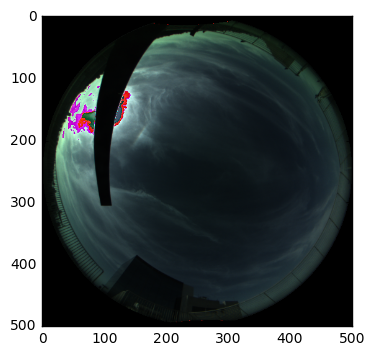

In [21]:
img = np.load('../../scripts_client/test.npy')
plt.imshow(img/40)

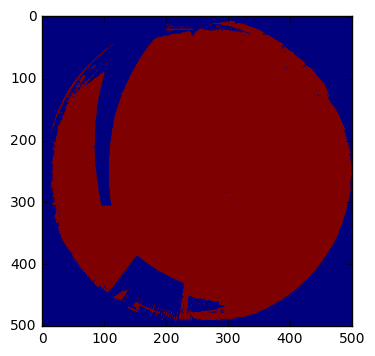

In [23]:
mask = np.ones(img.shape[:2],np.uint8)*cv2.GC_PR_FGD
mask[img.max(axis=2)<3] =  cv2.GC_PR_BGD
plt.imshow(mask)

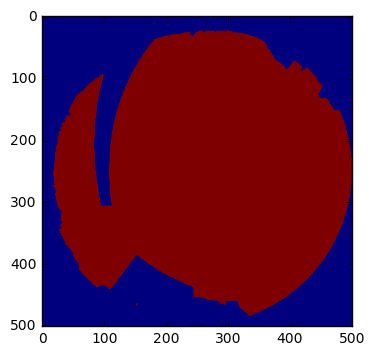

In [24]:
img_u8 = (255*np.clip(img, 0, 40)/40).astype(np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0, 0, 0, 0)
mask, bgdModel, fgdModel = cv2.grabCut(img_u8, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)
plt.imshow(mask)

In [49]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

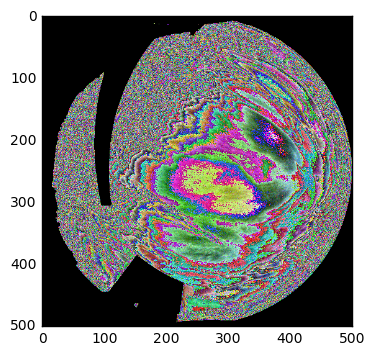

In [50]:
plt.imshow(img)

In [43]:
mask[60, 60]

2

In [27]:
mask[251, 251]

2

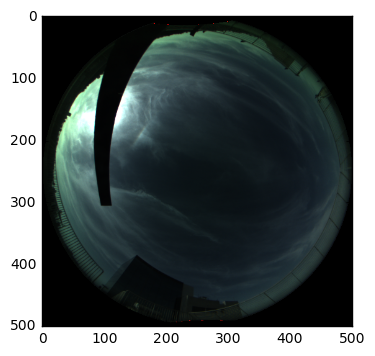

In [19]:
plt.imshow(img_u8)

In [1]:
import scipy.io as sio

In [2]:
base_path = r'I:\amit\Office backup\amit\studies\cameranetwork_git\scripts_client\reconstruction\2016_10_15_07_10_00'

In [5]:
sio.loadmat(os.path.join(base_path, 'grid.mat'))

{'X': array([[[-1718.96116836, -1718.96116836, -1718.96116836, ...,
          -1718.96116836, -1718.96116836, -1718.96116836],
         [-1618.96116836, -1618.96116836, -1618.96116836, ...,
          -1618.96116836, -1618.96116836, -1618.96116836],
         [-1518.96116836, -1518.96116836, -1518.96116836, ...,
          -1518.96116836, -1518.96116836, -1518.96116836],
         ..., 
         [ 1381.03883164,  1381.03883164,  1381.03883164, ...,
           1381.03883164,  1381.03883164,  1381.03883164],
         [ 1481.03883164,  1481.03883164,  1481.03883164, ...,
           1481.03883164,  1481.03883164,  1481.03883164],
         [ 1581.03883164,  1581.03883164,  1581.03883164, ...,
           1581.03883164,  1581.03883164,  1581.03883164]],
 
        [[-1718.96116836, -1718.96116836, -1718.96116836, ...,
          -1718.96116836, -1718.96116836, -1718.96116836],
         [-1618.96116836, -1618.96116836, -1618.96116836, ...,
          -1618.96116836, -1618.96116836, -1618.96116836],
 

In [6]:
import cPickle

In [34]:
with open(os.path.join(base_path, 'Masks.pkl'), 'rb') as f:
    masks = cPickle.load(f)
with open(os.path.join(base_path, 'Bs.pkl'), 'rb') as f:
    Bs = cPickle.load(f)

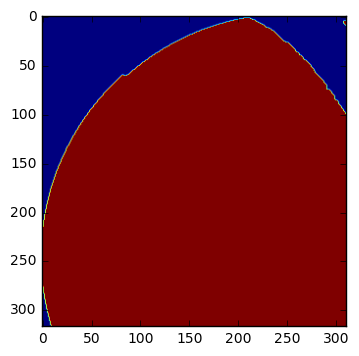

In [44]:
plt.imshow(masks['101'][0])

In [29]:
masks['101'][1][1,1]

1.0

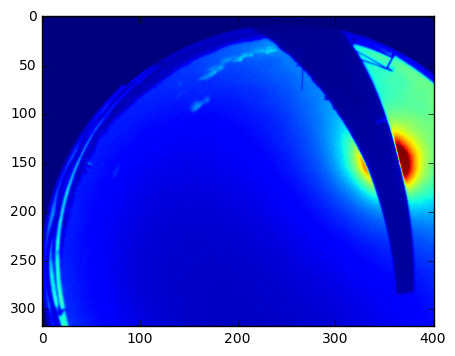

In [19]:
plt.imshow(Bs['101'])